<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Jan 19 16:24:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P5    N/A /  N/A |    102MiB /  2048MiB |     31%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

c:\Users\emirh\anaconda3\envs\tlib\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.1


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Surveillance and security: Computer vision is used in surveillance systems to detect and track individuals, monitor for suspicious behavior, and automatically alert security personnel.

2. Automotive: Computer vision is used in self-driving cars to interpret the environment, detect obstacles, and make decisions about how to navigate.

3. Robotics: Computer vision is used in robotics to enable the robots to perceive and understand their environment, locate and identify objects, and navigate to specific locations.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

- Overfitting in machine learning occurs when a model is trained too well on the training data, and as a result, it performs poorly on new, unseen data. This is because the model has learned the noise in the training data instead of the underlying pattern, and therefore is unable to generalize to new cases.

    In overfitting, a model becomes too complex and it will fit the training data very well but it won't perform well on unseen data. In other words, it memorizes the noise in the training data rather than generalizing a pattern to make predictions on unseen data. This problem can be addressed by using techniques such as regularization and cross-validation.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Regularization: You could use dropout on your neural networks, dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.

2. Cross-validation: Cross-validation is a technique that is used to evaluate a model's performance by dividing the data into training and validation sets. The model is trained on the training set and then evaluated on the validation set. This allows you to check how well the model is generalizing to new data and can help to prevent overfitting.

3. Early stopping: Early stopping is a method that helps to prevent overfitting by monitoring the performance of the model on a validation set during training. When the performance on the validation set starts to degrade, the training process is stopped to prevent the model from overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root=".",train=True,transform=ToTensor(),download=True)
test_data = datasets.MNIST(root=".",train=False,transform=ToTensor(),download=True)

In [4]:
len(train_data),len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

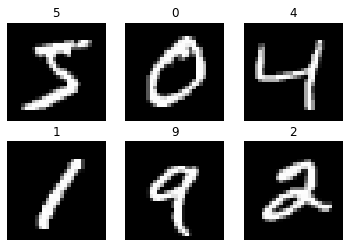

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3)
for i, ax in enumerate(axes.ravel()):

    img = train_data[i][0]  # torch.Size([1, 28, 28])
    img_sq = img.squeeze()  # torch.Size([28, 28])
    label = train_data[i][1]

    ax.imshow(img_sq, cmap="gray")
    ax.set_title(label)
    ax.axis(False)


In [6]:
img = train_data[0][0]
print(f"Image shape: {img.shape}")

Image shape: torch.Size([1, 28, 28])


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=32,shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
class TinyVGG(nn.Module):
    def __init__(self,input_shape,output_shape,hidden_units):
        super().__init__()
        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )
        self.clf = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
        )
    def forward(self,x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.clf(x)
        return x




In [9]:
model_2 = TinyVGG(1,len(train_data.classes),10).to(device)
model_2

TinyVGG(
  (layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
%%time
model_cpu = TinyVGG(1,len(train_data.classes),10).to("cpu")

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),lr=0.1)

epochs = 5

for epoch in range(epochs):
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader):
    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")
    model_cpu.train()
    y_pred = model_cpu(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataloader)
  test_loss =0
  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss += test_loss
    
    test_loss /= len(test_dataloader)
  
  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")
    

Epoch: 0 | Loss: 0.464 | Test loss: 0.000
Epoch: 1 | Loss: 0.073 | Test loss: 0.000
Epoch: 2 | Loss: 0.057 | Test loss: 0.000
Epoch: 3 | Loss: 0.047 | Test loss: 0.000
Epoch: 4 | Loss: 0.041 | Test loss: 0.000
CPU times: total: 20min 53s
Wall time: 5min 28s


In [11]:
%%time
model_gpu = TinyVGG(1,len(train_data.classes),10).to(device)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_gpu.parameters(),lr=0.1)

epochs = 5

for epoch in range(epochs):
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader):
    # Put data on CPU
    X, y = X.to(device), y.to(device)
    model_gpu.train()
    y_pred = model_gpu(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataloader)
  test_loss =0
  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss += test_loss
    
    test_loss /= len(test_dataloader)
  
  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Loss: 0.390 | Test loss: 0.000
Epoch: 1 | Loss: 0.077 | Test loss: 0.000
Epoch: 2 | Loss: 0.058 | Test loss: 0.000
Epoch: 3 | Loss: 0.048 | Test loss: 0.000
Epoch: 4 | Loss: 0.042 | Test loss: 0.000
CPU times: total: 2min 30s
Wall time: 2min 29s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

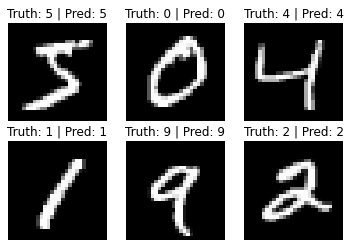

In [12]:
fig, axes = plt.subplots(2, 3)
for i, ax in enumerate(axes.ravel()):

    img = train_data[i][0]  # torch.Size([1, 28, 28])
    img_sq = img.squeeze()  # torch.Size([28, 28])
    label = train_data[i][1]
    model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    ax.imshow(img_sq, cmap="gray")
    ax.set_title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
    
    ax.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [13]:
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in enumerate(test_dataloader):
    
    X, y = X.to(device), y.to(device)
    
    y_pred_logits = model_gpu(X)
    
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()

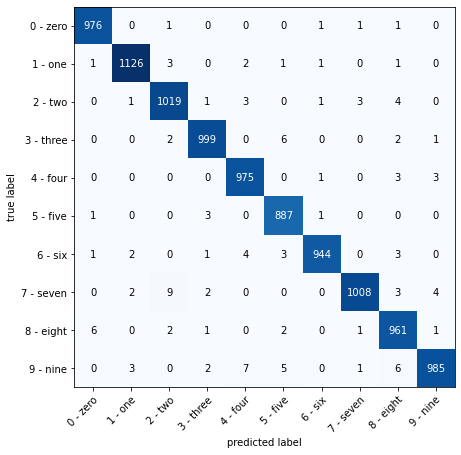

In [14]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(train_data.classes))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=train_data.classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?